In [71]:
import numpy as np
import pandas as pd

In [72]:
import warnings
warnings.filterwarnings("ignore")

### 1. Data Loading

In [73]:
# read dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [74]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
df.shape

(5572, 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### 2. Data cleaning

In [77]:
# drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [78]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [79]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [80]:
# Assign ham=0 and spam=1 using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [81]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [82]:
# Check missing values or null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [83]:
# Check for duplicate values
df.duplicated().sum()

403

In [84]:
# Remove duplicate values
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [85]:
df.shape

(5169, 2)

### 3. Exploratory Data Analysis

In [86]:
# Check target vaiable distribution
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

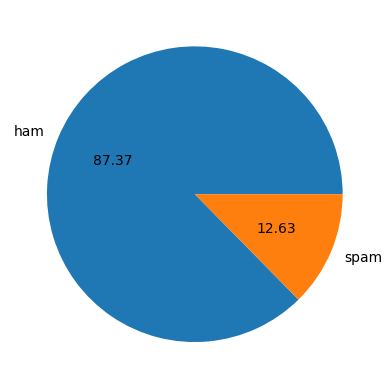

In [87]:
# Visual representation
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Imbalance dataset as per above pie diagram.

In [88]:
import nltk

In [89]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/nik4u/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
# Get number of characters from text column
df['num_characters'] = df['text'].apply(len)

In [91]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
# Find number of words using word_tokenize()
df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [93]:
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [94]:
# FInd number of sentences using sent_tokenize()
df['sentence_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [95]:
df.head()

,target,text,num_characters,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [96]:
# Check statistics
df[['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [97]:
# Check for 'ham' messages target variable only
df[df['target'] == 0][['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [98]:
# Check for 'spam' messages target variable only
df[df['target'] == 1][['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

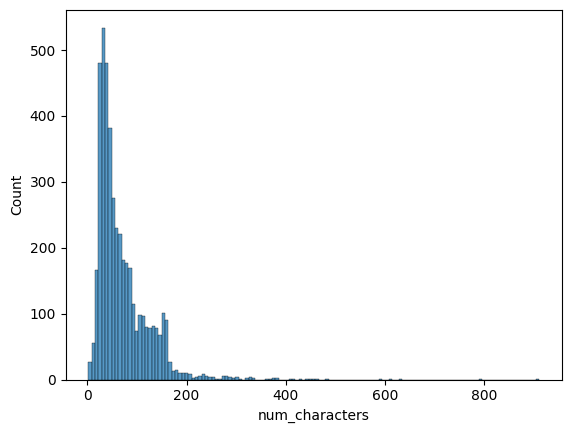

In [99]:
# Visualize distribution using histogram
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

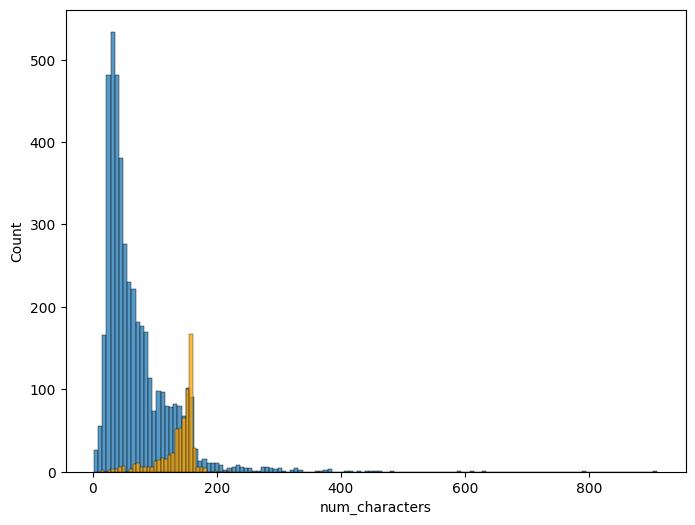

In [100]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color="orange")

Observations: Most of the 'ham' messages are using maximum words

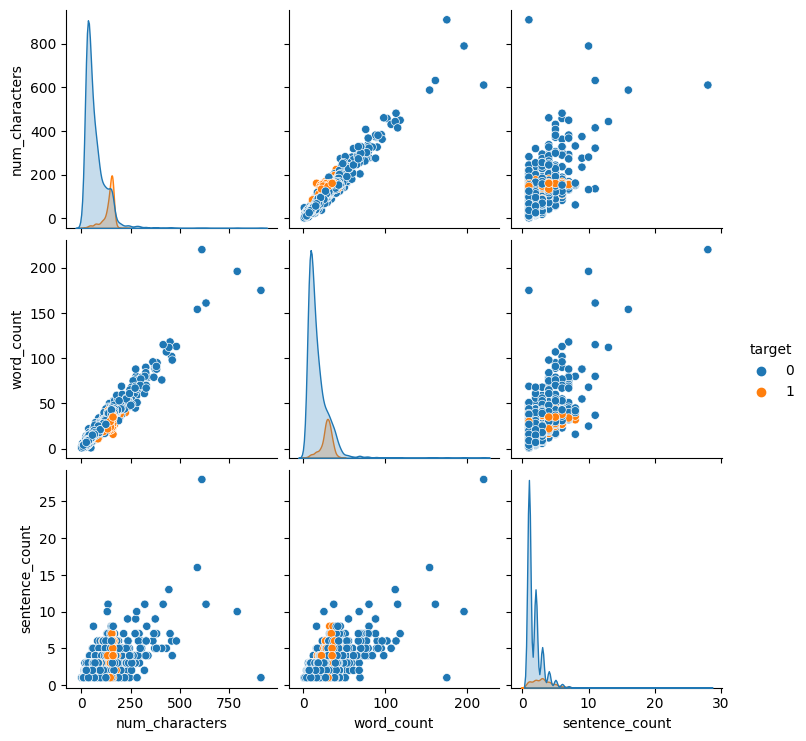

In [101]:
# Plot pairplot to check relationship of numerical features
sns.pairplot(df, hue="target")

<Axes: >

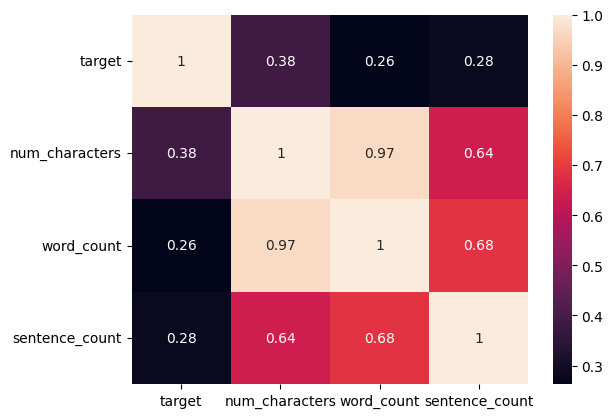

In [102]:
# Check correlation
sns.heatmap(df.corr(), annot=True)

Observations: As number of word counts in SMS increases leads to increase in SPAM occurance, On the basis of correlation we have to select on one variable for further processing i.e - num_character

In [103]:
import re
import spacy

In [104]:
# Define function for data preprocessing
def preprocessing(sentence):
  # Load nlp
  nlp = spacy.load('en_core_web_sm')
  # Text normalization
  sentence = sentence.lower() # Lower text
  # Remove punctuation via regular expression
  sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
  sentence = re.sub(r"https?://[A-Za-z0-9./]+", ' ', sentence)
  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])
  #print("token:", tokens)  
  return tokens

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [105]:
# Apply text preprocessing
df['transformed_text'] = df['text'].apply(transform_text)
    

KeyboardInterrupt: 